In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
%matplotlib inline

In [28]:
df_path = "/home/user/projects/agrivision/data/Agriculture-Vision/train_val_df.csv"
data_path = "/home/user/projects/agrivision/data/Agriculture-Vision/train_val"

In [7]:
train_df = df[df['ds_part'] == 'train']

In [23]:
planter_skip_train = train_df[train_df['planter_skip'] != 0]
names = planter_skip_train['name'].tolist()

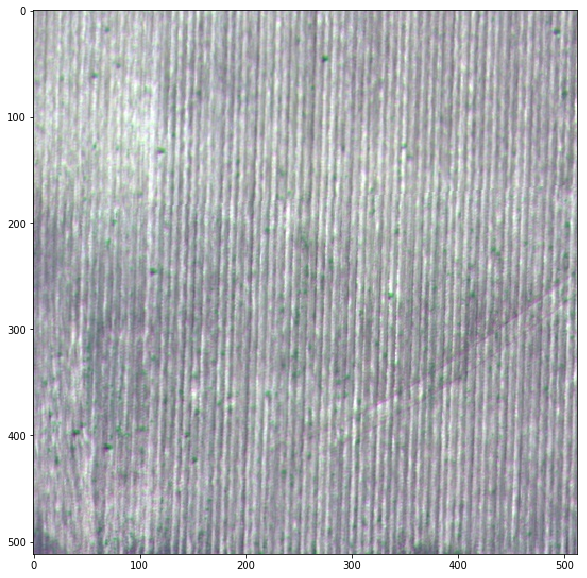

In [29]:
img_path = os.path.join(data_path, "images", "rgb", names[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [4]:
df = pd.read_csv(df_path)

In [12]:
# filter small groves 
too_small_data_df = df[df['field'].map(df['field'].value_counts()) < 4]
too_small_list = too_small_data_df['field'].tolist()
hold_out_small_df = df[df['field'].isin(too_small_list)]
df = df[~df['field'].isin(too_small_list)]

# Agrowing
train_man_agr, test_agr = train_test_split(df, test_size=0.1, random_state=0, stratify=df[['field']])
train_man_agr = df.append(hold_out_small_df)
train_man_agr.reset_index(inplace=True, drop=True)
test_agr.reset_index(inplace=True, drop=True)

In [15]:
len(train_man_agr)

17186

In [14]:
len(test_agr)

1719

In [17]:
train_man_agr.to_csv("/home/user/projects/agrivision/data/Agriculture-Vision/train_field_split.csv", index=False)
test_agr.to_csv("/home/user/projects/agrivision/data/Agriculture-Vision/val_field_split.csv", index=False)

In [8]:
train_df = df[df['ds_part'] == 'train']
val_df = df[df['ds_part'] == 'val']

train_df.to_csv("/home/user/projects/agrivision/data/Agriculture-Vision/train_simple.csv", index=False)
val_df.to_csv("/home/user/projects/agrivision/data/Agriculture-Vision/val_simple.csv", index=False)

In [18]:
# using dictionary comprehension to construct 
new_dict = {new_list: [] for new_list in range(4)} 
      
# printing result 
print ("New dictionary with empty lists as keys : " + str(new_dict))

New dictionary with empty lists as keys : {0: [], 1: [], 2: [], 3: []}
